In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("/content/drive/MyDrive/malicious_phish.csv")
train_df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [2]:
train_df.duplicated().sum()

10066

In [3]:
train_df = train_df.drop_duplicates()
train_df.duplicated().sum()

0

In [4]:
train_df.isna().sum()

url     0
type    0
dtype: int64

<Axes: xlabel='type', ylabel='count'>

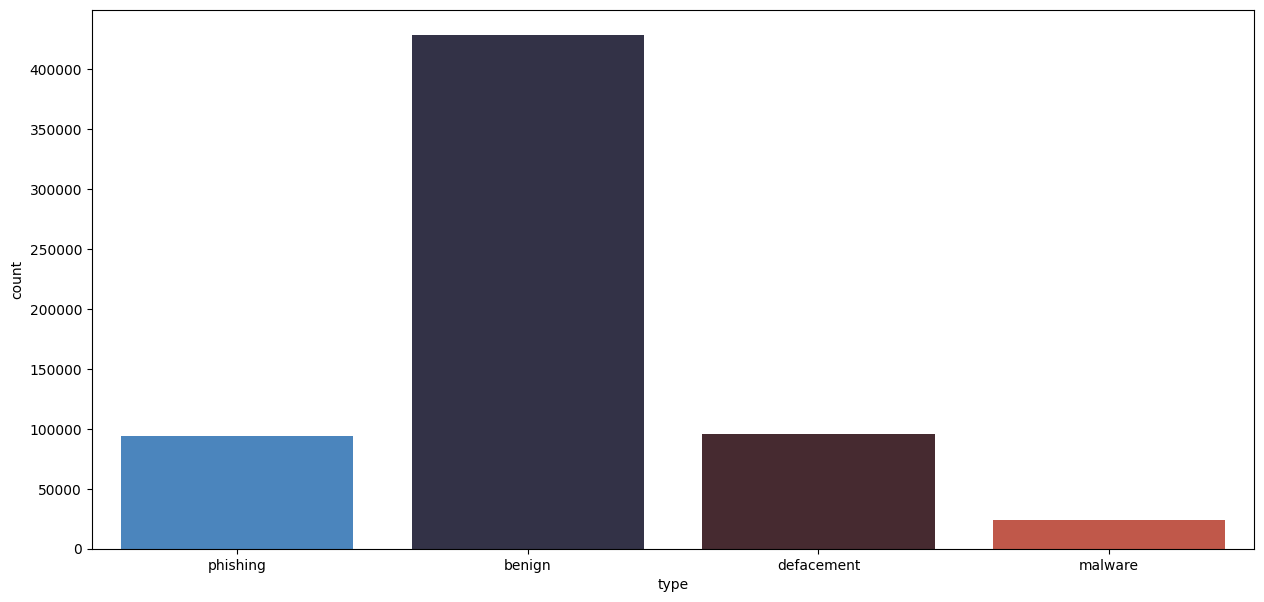

In [5]:
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.countplot(x=train_df['type'], palette='icefire')

In [6]:
df2 = train_df.copy()
df2['URL_length'] =  [len(i) for i in train_df['url']]


In [7]:
!pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 1.7 MB/s eta 0:00:00


In [8]:
import tldextract

domains = []
for url in df2['url']:
  ext = tldextract.extract(url)
  domain = ext.domain
  if len(ext.subdomain) > 0:
    domain = ext.subdomain + '.' + domain
  if len(ext.suffix) > 0:
    domain += '.' + ext.suffix
  domains.append(domain)

df2['domain_length'] = [len(i) for i in domains]

print(df2.head())


                                                 url        type  URL_length  \
0                                   br-icloud.com.br    phishing          16   
1                mp3raid.com/music/krizz_kaliko.html      benign          35   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          31   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          88   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         235   

   domain_length  
0             16  
1             11  
2             14  
3             21  
4             23  


In [9]:
import re
ipv4_pattern = r'^(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$'
ipv4_presence = [1 if re.search(ipv4_pattern, url) else 0 for url in df2['url']]
print(sum(ipv4_presence))

0


In [10]:
http_pattern = r'http://'
http_presence = [1 if re.search(http_pattern, url) else 0 for url in df2['url']]
df2['http_presence'] = http_presence
df2.head()

,url,type,URL_length,domain_length,http_presence
0,br-icloud.com.br,phishing,16,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1


In [11]:
https_pattern = r'https://'
https_presence = [1 if re.search(https_pattern, url) else 0 for url in df2['url']]
df2['https_presence'] = https_presence
df2.head()

,url,type,URL_length,domain_length,http_presence,https_presence
0,br-icloud.com.br,phishing,16,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0


In [12]:
 dot_counts = [url.count('.') for url in df2['url']]
 df2['dot_counts'] = dot_counts
 df2.head()

,url,type,URL_length,domain_length,http_presence,https_presence,dot_counts
0,br-icloud.com.br,phishing,16,16,0,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0,2


In [13]:
count_dashes = [url.count('-') for url in df2['url']]
df2['count_dashes'] = count_dashes
df2.head()

,url,type,URL_length,domain_length,http_presence,https_presence,dot_counts,count_dashes
0,br-icloud.com.br,phishing,16,16,0,0,2,1
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0,2,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,3,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0,2,1


In [14]:
count_underscores = [url.count('_') for url in df2['url']]
df2['count_underscores'] = count_underscores
df2.head()

,url,type,URL_length,domain_length,http_presence,https_presence,dot_counts,count_dashes,count_underscores
0,br-icloud.com.br,phishing,16,16,0,0,2,1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0,2,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0,2,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,3,1,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0,2,1,1


In [15]:
count_slashes = [url.count('/') for url in df2['url']]
df2['count_slashes'] = count_slashes
df2.head()

,url,type,URL_length,domain_length,http_presence,https_presence,dot_counts,count_dashes,count_underscores,count_slashes
0,br-icloud.com.br,phishing,16,16,0,0,2,1,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0,2,0,1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0,2,0,0,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,3,1,2,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0,2,1,1,3


In [16]:
count_ques = [url.count('?') for url in df2['url']]
df2['count_ques'] = count_ques
df2.head()

,url,type,URL_length,domain_length,http_presence,https_presence,dot_counts,count_dashes,count_underscores,count_slashes,count_ques
0,br-icloud.com.br,phishing,16,16,0,0,2,1,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0,2,0,1,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0,2,0,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,3,1,2,3,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0,2,1,1,3,1


In [17]:
count_non_alphanumeric = [len(re.findall(r'[^a-zA-Z0-9]', url)) for url in df2['url']]
df2['count_non_alphanumeric'] = count_non_alphanumeric
df2.head()

,url,type,URL_length,domain_length,http_presence,https_presence,dot_counts,count_dashes,count_underscores,count_slashes,count_ques,count_non_alphanumeric
0,br-icloud.com.br,phishing,16,16,0,0,2,1,0,0,0,3
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0,2,0,1,2,0,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0,2,0,0,3,0,5
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,3,1,2,3,1,18
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0,2,1,1,3,1,14


In [18]:
count_digits = [len(re.findall(r'\d', url)) for url in df2['url']]
df2['count_digits'] = count_digits
df2.head()

,url,type,URL_length,domain_length,http_presence,https_presence,dot_counts,count_dashes,count_underscores,count_slashes,count_ques,count_non_alphanumeric,count_digits
0,br-icloud.com.br,phishing,16,16,0,0,2,1,0,0,0,3,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0,2,0,1,2,0,5,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0,2,0,0,3,0,5,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,3,1,2,3,1,18,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0,2,1,1,3,1,14,22


In [19]:
count_letters = [len(re.findall(r'[a-zA-Z]', url)) for url in df2['url']]
df2['count_letters'] = count_letters
df2.head()

,url,type,URL_length,domain_length,http_presence,https_presence,dot_counts,count_dashes,count_underscores,count_slashes,count_ques,count_non_alphanumeric,count_digits,count_letters
0,br-icloud.com.br,phishing,16,16,0,0,2,1,0,0,0,3,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0,2,0,1,2,0,5,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0,2,0,0,3,0,5,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,3,1,2,3,1,18,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0,2,1,1,3,1,14,22,199


In [20]:
import urllib.parse
count_params = []



for url in df2['url']:
    parsed_url = urllib.parse.urlparse(url)
    query_params = urllib.parse.parse_qs(parsed_url.query)
    count_params.append(len(query_params))

df2['count_params'] = count_params
df2.head()


,url,type,URL_length,domain_length,http_presence,https_presence,dot_counts,count_dashes,count_underscores,count_slashes,count_ques,count_non_alphanumeric,count_digits,count_letters,count_params
0,br-icloud.com.br,phishing,16,16,0,0,2,1,0,0,0,3,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0,2,0,1,2,0,5,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0,2,0,0,3,0,5,1,25,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,3,1,2,3,1,18,7,63,4
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0,2,1,1,3,1,14,22,199,3


In [21]:
has_php = [1 if 'php' in url.lower() else 0 for url in df2['url']]
df2['has_php'] = has_php
df2.head()

,url,type,URL_length,domain_length,http_presence,https_presence,dot_counts,count_dashes,count_underscores,count_slashes,count_ques,count_non_alphanumeric,count_digits,count_letters,count_params,has_php
0,br-icloud.com.br,phishing,16,16,0,0,2,1,0,0,0,3,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0,2,0,1,2,0,5,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0,2,0,0,3,0,5,1,25,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,3,1,2,3,1,18,7,63,4,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0,2,1,1,3,1,14,22,199,3,1


In [22]:
has_html = [1 if 'html' in url.lower() else 0 for url in df2['url']]
df2['has_html'] = has_html
df2.head()

,url,type,URL_length,domain_length,http_presence,https_presence,dot_counts,count_dashes,count_underscores,count_slashes,count_ques,count_non_alphanumeric,count_digits,count_letters,count_params,has_php,has_html
0,br-icloud.com.br,phishing,16,16,0,0,2,1,0,0,0,3,0,13,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,11,0,0,2,0,1,2,0,5,1,29,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,14,0,0,2,0,0,3,0,5,1,25,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,3,1,2,3,1,18,7,63,4,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,1,0,2,1,1,3,1,14,22,199,3,1,0


In [33]:
from sklearn.preprocessing import LabelEncoder

subset_df = df2.sample(frac=0.1, random_state=42)
le = LabelEncoder()
X = subset_df.drop(columns=['type', 'url'])
y = le.fit_transform(subset_df['type'])

In [34]:
from sklearn.model_selection import train_test_split
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X, y, test_size=0.15, random_state=42)
(X_train_subset.shape, X_test_subset.shape, y_train_subset.shape, y_test_subset.shape)

((54495, 15), (9617, 15), (54495,), (9617,))

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier_subset = RandomForestClassifier(random_state=42)
rf_classifier_subset.fit(X_train_subset, y_train_subset)

# Making predictions and evaluating the classifier
rf_predictions_subset = rf_classifier_subset.predict(X_test_subset)
accuracy_subset = accuracy_score(y_test_subset, rf_predictions_subset)

# Output the accuracy
print(f"Model Accuracy: {accuracy_subset}")

Model Accuracy: 0.9314755121139648


In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier_subset = DecisionTreeClassifier(random_state=42)
dt_classifier_subset.fit(X_train_subset, y_train_subset)

# Making predictions and evaluating the classifier
dt_predictions_subset = dt_classifier_subset.predict(X_test_subset)
accuracy_subset = accuracy_score(y_test_subset, dt_predictions_subset)

# Output the accuracy
print(f"Model Accuracy: {accuracy_subset}")

Model Accuracy: 0.9100551107413954


In [37]:
from sklearn.neighbors import KNeighborsClassifier
# Training the KNN classifier
knn_classifier_subset = KNeighborsClassifier()
knn_classifier_subset.fit(X_train_subset, y_train_subset)

# Making predictions and evaluating the classifier
knn_predictions_subset = knn_classifier_subset.predict(X_test_subset)
accuracy_subset = accuracy_score(y_test_subset, knn_predictions_subset)

# Output the accuracy
print(f"Model Accuracy: {accuracy_subset}")

Model Accuracy: 0.8674222730581262


In [38]:
from sklearn.svm import SVC

# Training the SVM classifier
svm_classifier_subset = SVC(random_state=42)
svm_classifier_subset.fit(X_train_subset, y_train_subset)

# Making predictions and evaluating the classifier
svm_predictions_subset = svm_classifier_subset.predict(X_test_subset)
accuracy_subset = accuracy_score(y_test_subset, svm_predictions_subset)

# Output the accuracy
print(f"Model Accuracy: {accuracy_subset}")

Model Accuracy: 0.7917229905375897


In [39]:
from sklearn.metrics import f1_score, recall_score

# Assuming you have already trained models and made predictions, e.g., svm_predictions, rf_predictions, etc.

# Calculate F1 score and recall for SVM
f1_svm = f1_score(y_test_subset, svm_predictions_subset, average='weighted')
recall_svm = recall_score(y_test_subset, svm_predictions_subset, average='weighted')

# Calculate F1 score and recall for Random Forest
f1_rf = f1_score(y_test_subset, rf_predictions_subset, average='weighted')
recall_rf = recall_score(y_test_subset, rf_predictions_subset, average='weighted')

# Calculate F1 score and recall for Decision Tree
f1_dt = f1_score(y_test_subset, dt_predictions_subset, average='weighted')
recall_dt = recall_score(y_test_subset, dt_predictions_subset, average='weighted')

# Calculate F1 score and recall for KNN
f1_knn = f1_score(y_test_subset, knn_predictions_subset, average='weighted')
recall_knn = recall_score(y_test_subset, knn_predictions_subset, average='weighted')

# Print the scores
print(f"SVM - F1 Score: {f1_svm}, Recall: {recall_svm}")
print(f"Random Forest - F1 Score: {f1_rf}, Recall: {recall_rf}")
print(f"Decision Tree - F1 Score: {f1_dt}, Recall: {recall_dt}")
print(f"KNN - F1 Score: {f1_knn}, Recall: {recall_knn}")


SVM - F1 Score: 0.7253372654138028, Recall: 0.7917229905375897
Random Forest - F1 Score: 0.929765117717443, Recall: 0.9314755121139648
Decision Tree - F1 Score: 0.909806951599334, Recall: 0.9100551107413954
KNN - F1 Score: 0.8631370774382886, Recall: 0.8674222730581262


In [40]:
columns_to_drop = ['URL_length', 'count_digits', 'count_params']
X_train_scaled = X_train_subset.drop(columns=columns_to_drop)
X_test_scaled = X_test_subset.drop(columns=columns_to_drop)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
dt_classifier_scaled = DecisionTreeClassifier(random_state=42)
dt_classifier_scaled.fit(X_train_scaled, y_train_subset)

param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
dt_grid_search.fit(X_train_scaled, y_train_subset)

best_dt = dt_grid_search.best_estimator_
predictions = best_dt.predict(X_test_scaled)
print(classification_report(y_test_subset, predictions))
print("Accuracy:", accuracy_score(y_test_subset, predictions))

# Making predictions and evaluating the classifier
# dt_predictions_scaled = dt_classifier_scaled.predict(X_test_scaled)
# accuracy_subset_scaled = accuracy_score(y_test_subset, dt_predictions_scaled)

# Output the accuracy
# print(f"Model Accuracy: {accuracy_subset_scaled}")
# # Calculate F1 score and recall for Decision Tree
# f1_dt = f1_score(y_test_subset, dt_predictions_scaled, average='weighted')
# recall_dt = recall_score(y_test_subset, dt_predictions_scaled, average='weighted')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6350
           1       0.91      0.95      0.93      1452
           2       0.90      0.84      0.87       345
           3       0.78      0.70      0.74      1470

    accuracy                           0.92      9617
   macro avg       0.89      0.86      0.87      9617
weighted avg       0.91      0.92      0.91      9617

Accuracy: 0.916606010190288


In [44]:
param_grid = {
    'n_estimators': [10, 50],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_scaled, y_train_subset)

best_rf = rf_grid_search.best_estimator_
predictions = best_rf.predict(X_test_scaled)

print(classification_report(y_test_subset, predictions))
print("Accuracy:", accuracy_score(y_test_subset, predictions))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6350
           1       0.92      0.98      0.95      1452
           2       0.95      0.82      0.88       345
           3       0.84      0.72      0.78      1470

    accuracy                           0.93      9617
   macro avg       0.92      0.87      0.89      9617
weighted avg       0.93      0.93      0.93      9617

Accuracy: 0.9306436518664865


In [45]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2)
knn_grid_search.fit(X_train_scaled, y_train_subset)
best_knn = knn_grid_search.best_estimator_
predictions = best_knn.predict(X_test_scaled)

print(classification_report(y_test_subset, predictions))
print("Accuracy:", accuracy_score(y_test_subset, predictions))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6350
           1       0.84      0.91      0.87      1452
           2       0.93      0.81      0.87       345
           3       0.78      0.61      0.69      1470

    accuracy                           0.89      9617
   macro avg       0.87      0.82      0.84      9617
weighted avg       0.89      0.89      0.89      9617

Accuracy: 0.8891546220235


In [46]:
!pip install xgboost

In [47]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the classifier
xgb_clf.fit(X_train_subset, y_train_subset)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
# Predictions
y_pred = xgb_clf.predict(X_test_subset)

# Calculate metrics
accuracy = accuracy_score(y_test_subset, y_pred)
f1 = f1_score(y_test_subset, y_pred, average='weighted')
recall = recall_score(y_test_subset, y_pred, average='weighted')

# Print performance metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")

Accuracy: 0.936674638660705
F1 Score: 0.9351282345087895
Recall: 0.936674638660705


In [53]:
param_grid = {
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [10, 50]
}
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_subset, y_train_subset)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test_subset)
print(f"Accuracy: {accuracy_score(y_test_subset, y_pred)}")
print(f"F1 Score: {f1_score(y_test_subset, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test_subset, y_pred, average='weighted')}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuracy: 0.9357387958822918
F1 Score: 0.9342882702534658
Recall: 0.9357387958822918


In [54]:
print(classification_report(y_test_subset, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6350
           1       0.94      0.98      0.96      1452
           2       0.98      0.84      0.91       345
           3       0.84      0.75      0.79      1470

    accuracy                           0.94      9617
   macro avg       0.93      0.89      0.90      9617
weighted avg       0.93      0.94      0.93      9617

